#  <span style="color:orange">Final Project</span>

# 0.0 Configurar MLFlow

In [ ]:
 install --upgrade --user git+git://github.com/pycaret/pycaret.git

In [1]:
import mlflow
import os

# you can set your tracking server URI programmatically:
mlflow.set_tracking_uri('https://mlflow-aie3.ai.spglobal.com/')
os.environ['MLFLOW_S3_ENDPOINT_URL'] = 'https://minio-aie3.ai.spglobal.com/'
os.environ['LOGNAME'] = 'oswaldo'

# 1.0 Importar datos de entrenamiento

In [2]:
import pandas as pd
dataset = pd.read_csv("training2.csv")

/Users/oswaldo_gomez/Library/Caches/pypoetry/virtualenvs/time-series-CSagJmyP-py3.7/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [3]:
dataset.dropna(inplace=True)

In [4]:
#check the shape of data
dataset.shape

/Users/oswaldo_gomez/Library/Caches/pypoetry/virtualenvs/time-series-CSagJmyP-py3.7/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(161, 24)

In [5]:
dataset['Points'].describe()

count    161.000000
mean      92.546584
std       56.910121
min        8.000000
25%       44.000000
50%       82.000000
75%      125.000000
max      278.000000
Name: Points, dtype: float64

<AxesSubplot:>

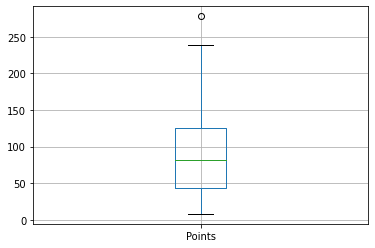

In [6]:
dataset.boxplot(column=['Points'])

## Convertimos la columna de punto de numérica a categórica, con dos categorías. Bueno y Malo. 

### Malo se define entre el valor mínimo teórico y la media. Bueno es entre la media y el valor máximo observado

In [7]:
bins=[0,93,278]
names=['Bad','Good']
dataset['Points_range']=pd.cut(dataset['Points'],bins,labels=names)

/Users/oswaldo_gomez/Library/Caches/pypoetry/virtualenvs/time-series-CSagJmyP-py3.7/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [8]:
dataset.sort_values(by='Points_range')

,duration,key,loudness,mode,tempo,artist_hotttnesss,end_of_fade_in,start_of_fade_out,mode_confidence,key_confidence,...,energy,speechiness,acousticness,instrumentalness,liveness,valence,duration_ms,Points,Country,Points_range
0,242.77333,8,-6.863,1,81.975,0.69,0.00000,230.35938,0.224,0.192,...,0.5520,0.0981,0.1760,0.000000,0.2520,0.586,242773,59.0,Armenia,Bad
132,216.99982,10,-3.865,1,129.972,0.02,0.16834,213.10114,0.497,0.593,...,0.9150,0.0483,0.0968,0.000074,0.1770,0.695,217000,88.0,Russia,Bad
81,185.75693,5,-4.960,0,98.765,0.02,0.00000,177.50494,0.861,0.783,...,0.4250,0.0330,0.8410,0.000047,0.1180,0.364,185757,38.0,Albania,Bad
135,229.45052,7,-7.191,1,91.043,0.08,0.30172,221.08880,0.689,0.712,...,0.5770,0.0562,0.0133,0.000000,0.0804,0.770,229451,52.0,Moldova,Bad
78,165.90395,11,-6.977,0,175.909,0.27,0.38866,158.30203,0.611,0.415,...,0.6060,0.1070,0.6190,0.000000,0.1510,0.504,165904,70.0,Netherlands,Bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,60.01764,11,-5.584,0,96.807,0.40,0.00000,60.01764,0.296,0.252,...,0.8760,0.4480,0.6140,0.000000,0.5930,0.592,60018,146.0,Armenia,Good
75,218.70876,1,-14.026,0,149.974,0.00,0.09293,209.55429,0.750,0.572,...,0.3590,0.0329,0.2640,0.000000,0.1010,0.384,218709,159.0,Italy,Good
66,211.26735,0,-5.549,1,129.968,0.03,0.00000,205.18893,0.590,0.480,...,0.6900,0.0310,0.0144,0.000038,0.3460,0.322,211267,185.0,Malta,Good
63,183.42857,2,-5.831,1,140.005,0.00,0.00000,177.49333,0.521,0.771,...,0.6900,0.0454,0.1870,0.000077,0.1130,0.644,183429,105.0,Belarus,Good


# 2.0 Vamos a comenzar el experimento, en donde sólo utilizaremos las columnas no ignoradas (precedidas por un #, por ejempo #year no es ignorada. O lo que es lo mismo, es considerada)

## El objetivo es encontrar un modelo de aprendizaje automático que logre predecir la categoría de bueno/malo con base en año (categórico), bailable, energía y acustica de las canciones utilizando Spotify API get-audio-features y get-audio-analysis

In [9]:
from pycaret.classification import *
exp_mclf101 = setup(data = dataset,
                    target = 'Points_range',
                    session_id=123,
                    # Todas las columnas que tienen un hash (#), serán incluidas para el análisis
                    ignore_features=[#'duration',
                                     #'key',
                                     #'loudness',
                                     #'mode',
                                     #'tempo',
                                     #'artist_hotttnesss',
                                     'end_of_fade_in',
                                     'start_of_fade_out',
                                     'mode_confidence',                       
                                     'key_confidence',
                                     #'time_signature',
                                     'time_signature_confidence',
                                     #'year',
                                     #'popularity', 
                                     #'danceability',
                                     #'energy',
                                     #'speechiness',
                                     #'acousticness',
                                     #'instrumentalness',
                                     #'liveness',
                                     #'valence',
                                     'duration_ms',
                                     'Points',
                                     'Country',
                                     #'Points_range',
                                    ],
                    log_experiment=True,
                    experiment_name="Final_paper_final_large_iteration",
                    log_plots=True,
                    profile=False,
                    pca=True,
                    remove_outliers=True,
                    use_gpu=True) 

,Description,Value
0,session_id,123
1,Target,Points_range
2,Target Type,Binary
3,Label Encoded,"Bad: 0, Good: 1"
4,Original Data,"(161, 25)"
5,Missing Values,False
6,Numeric Features,12
7,Categorical Features,4
8,Ordinal Features,False
9,High Cardinality Features,False


# 3.0 Comparando múltiples modelos

## Vamos a ordenarlos de mayor a menor precisión

In [10]:
best = compare_models(sort='Precision')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
qda,Quadratic Discriminant Analysis,0.5655,0.6040,0.5700,0.6083,0.5381,0.1399,0.1699,0.0540
ada,Ada Boost Classifier,0.5582,0.6083,0.5617,0.5768,0.5448,0.1205,0.1326,0.5510
gbc,Gradient Boosting Classifier,0.5627,0.6147,0.5667,0.5747,0.5417,0.1300,0.1367,0.5110
nb,Naive Bayes,0.5455,0.6187,0.5467,0.5640,0.5218,0.0949,0.1058,0.0460
knn,K Neighbors Classifier,0.5264,0.5360,0.5233,0.5336,0.5144,0.0490,0.0557,1.2260
catboost,CatBoost Classifier,0.5091,0.5453,0.5100,0.5248,0.4890,0.0230,0.0301,58.4590
lr,Logistic Regression,0.5391,0.5113,0.5417,0.5209,0.5061,0.0818,0.0845,0.0780
ridge,Ridge Classifier,0.5391,0.0000,0.5417,0.5209,0.5061,0.0818,0.0845,0.0400
lda,Linear Discriminant Analysis,0.5391,0.5113,0.5417,0.5209,0.5061,0.0818,0.0845,0.0950
et,Extra Trees Classifier,0.5182,0.5877,0.5200,0.5171,0.4920,0.0426,0.0386,3.3160


# 3.0 Crearemos 3 objetos modelo que presentaron las métricas más altas de Precisión

### Gradient Boosting Classifier

In [11]:
gbc = create_model('gbc')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.6364,0.4000,0.6667,0.7980,0.5974,0.3125,0.4303
1,0.6364,0.7000,0.6333,0.6364,0.6364,0.2667,0.2667
2,0.6364,0.6667,0.6333,0.6364,0.6364,0.2667,0.2667
3,0.5455,0.5667,0.5667,0.5909,0.5221,0.1270,0.1491
4,0.7273,0.8667,0.7333,0.7394,0.7273,0.4590,0.4667
5,0.5455,0.4667,0.5333,0.5390,0.5377,0.0678,0.0690
6,0.6000,0.8400,0.6000,0.6190,0.5833,0.2000,0.2182
7,0.3000,0.2000,0.3000,0.1875,0.2308,-0.4000,-0.5000
8,0.5000,0.6800,0.5000,0.5000,0.4949,0.0000,0.0000
9,0.5000,0.7600,0.5000,0.5000,0.4505,0.0000,0.0000


In [12]:
#trained model object is stored in the variable 'dt'. 
print(gbc)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=123, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)


### Random Forest

In [46]:
qda = create_model('qda')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.3636,0.4333,0.3833,0.3523,0.3310,-0.2222,-0.2609
1,0.6364,0.7333,0.6667,0.7980,0.5974,0.3125,0.4303
2,0.5455,0.6000,0.5667,0.5909,0.5221,0.1270,0.1491
3,0.5455,0.6000,0.5667,0.5909,0.5221,0.1270,0.1491
4,0.7273,0.6667,0.7167,0.7305,0.7226,0.4407,0.4485
5,0.6364,0.7667,0.6000,0.7818,0.5606,0.2143,0.3464
6,0.6000,0.6400,0.6000,0.6190,0.5833,0.2000,0.2182
7,0.4000,0.3600,0.4000,0.3810,0.3750,-0.2000,-0.2182
8,0.4000,0.4400,0.4000,0.3810,0.3750,-0.2000,-0.2182
9,0.8000,0.8000,0.8000,0.8571,0.7917,0.6000,0.6547


### Ada Boost Classifier	

In [14]:
ada = create_model('ada')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.6364,0.7333,0.6667,0.7980,0.5974,0.3125,0.4303
1,0.7273,0.6667,0.7333,0.7394,0.7273,0.4590,0.4667
2,0.4545,0.6667,0.4333,0.4242,0.4253,-0.1379,-0.1491
3,0.2727,0.2833,0.2833,0.2662,0.2606,-0.4194,-0.4485
4,0.6364,0.8333,0.6500,0.6688,0.6303,0.2903,0.3105
5,0.4545,0.5000,0.4500,0.4545,0.4545,-0.1000,-0.1000
6,0.7000,0.6800,0.7000,0.7083,0.6970,0.4000,0.4082
7,0.2000,0.0400,0.2000,0.1429,0.1667,-0.6000,-0.6547
8,0.7000,0.7000,0.7000,0.7083,0.6970,0.4000,0.4082
9,0.8000,0.9800,0.8000,0.8571,0.7917,0.6000,0.6547


# 4.0 Vamos a afinar los hiperparámetros buscando maximizar la precisión

### Gradient Boosting Classifier

In [15]:
tuned_gbc = tune_model(gbc,optimize = 'Precision',choose_better=True,n_iter=1000)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7273,0.7000,0.7333,0.7394,0.7273,0.4590,0.4667
1,0.6364,0.6667,0.6333,0.6364,0.6364,0.2667,0.2667
2,0.9091,1.0000,0.9167,0.9242,0.9091,0.8197,0.8333
3,0.5455,0.5333,0.5500,0.5545,0.5455,0.0984,0.1000
4,0.9091,1.0000,0.9000,0.9221,0.9075,0.8136,0.8281
5,0.6364,0.5667,0.6167,0.6439,0.6169,0.2414,0.2609
6,0.9000,0.8200,0.9000,0.9167,0.8990,0.8000,0.8165
7,0.5000,0.3200,0.5000,0.5000,0.4505,0.0000,0.0000
8,0.4000,0.5000,0.4000,0.3810,0.3750,-0.2000,-0.2182
9,0.6000,0.7800,0.6000,0.6190,0.5833,0.2000,0.2182


In [16]:
#tuned model object is stored in the variable 'tuned_dt'. 
print(tuned_gbc)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.488, loss='deviance', max_depth=2,
                           max_features=1.0, max_leaf_nodes=None,
                           min_impurity_decrease=0.001, min_impurity_split=None,
                           min_samples_leaf=3, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=10,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=123, subsample=0.55, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)


### Random Forest

In [47]:
tuned_qda = tune_model(qda,optimize = 'Precision',choose_better=True,n_iter=1000)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.3636,0.4333,0.3833,0.3523,0.3310,-0.2222,-0.2609
1,0.6364,0.7333,0.6667,0.7980,0.5974,0.3125,0.4303
2,0.5455,0.6000,0.5667,0.5909,0.5221,0.1270,0.1491
3,0.5455,0.6000,0.5667,0.5909,0.5221,0.1270,0.1491
4,0.7273,0.6667,0.7167,0.7305,0.7226,0.4407,0.4485
5,0.6364,0.7667,0.6000,0.7818,0.5606,0.2143,0.3464
6,0.6000,0.6400,0.6000,0.6190,0.5833,0.2000,0.2182
7,0.4000,0.3600,0.4000,0.3810,0.3750,-0.2000,-0.2182
8,0.4000,0.4400,0.4000,0.3810,0.3750,-0.2000,-0.2182
9,0.8000,0.8000,0.8000,0.8571,0.7917,0.6000,0.6547


### Ada Boost Classifier	

In [18]:
tuned_ada = tune_model(ada,optimize = 'Precision',choose_better=True,n_iter=1000)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.5455,0.7333,0.5833,0.7727,0.4589,0.1538,0.2887
1,0.6364,0.6333,0.6333,0.6364,0.6364,0.2667,0.2667
2,0.5455,0.7000,0.5333,0.5390,0.5377,0.0678,0.0690
3,0.3636,0.3333,0.3667,0.3697,0.3636,-0.2623,-0.2667
4,0.8182,0.8000,0.8167,0.8182,0.8182,0.6333,0.6333
5,0.7273,0.5667,0.7000,0.8182,0.6961,0.4211,0.5164
6,0.8000,0.7600,0.8000,0.8000,0.8000,0.6000,0.6000
7,0.4000,0.1200,0.4000,0.3810,0.3750,-0.2000,-0.2182
8,0.7000,0.6600,0.7000,0.7083,0.6970,0.4000,0.4082
9,0.9000,1.0000,0.9000,0.9167,0.8990,0.8000,0.8165


# 5.0 Gráficas de los modelos afinados

### Matriz de confusión

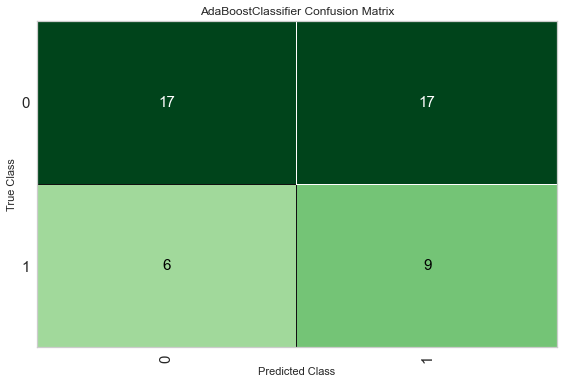

In [19]:
plot_model(tuned_ada, plot = 'confusion_matrix')

### Mapa de decisión

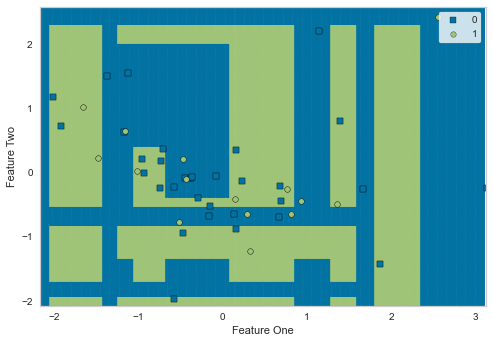

In [20]:
plot_model(tuned_ada, plot='boundary')

### Error

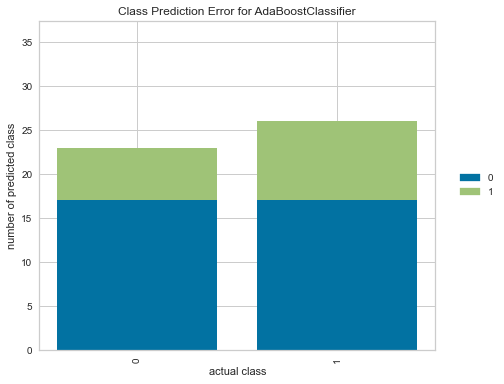

In [21]:
plot_model(tuned_ada, plot = 'error')

### Seleccionar dinámicamente las gráficas

In [48]:
evaluate_model(tuned_qda)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

# 6.0 Predicción en el conjunto de entrenamiento

In [43]:
predict_model(tuned_ada);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Ada Boost Classifier,0.5306,0.5480,0.5500,0.6188,0.5483,0.0830,0.0923


In [49]:
predict_model(tuned_qda);

NotFittedError: This QuadraticDiscriminantAnalysis instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [45]:
predict_model(tuned_gbc);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Gradient Boosting Classifier,0.5102,0.5127,0.5167,0.5895,0.5292,0.0281,0.0307


# 7.0 Entrenaremos sobre el 100% de los datos ya que el modelo fue afinado y está listo para producción

In [24]:
final_ada = finalize_model(tuned_ada)

In [25]:
final_qda = finalize_model(tuned_qda)

In [26]:
final_gbc = finalize_model(tuned_gbc)

In [27]:
#Final K Nearest Neighbour parameters for deployment
print(final_ada)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
                   learning_rate=0.104, n_estimators=260, random_state=123)


# 8.0 Serializamos el modelo

In [28]:
save_model(final_ada,'Final ada Model 08Feb2020')

Transformation Pipeline and Model Succesfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True,
                                       features_todrop=['end_of_fade_in',
                                                        'start_of_fade_out',
                                                        'mode_confidence',
                                                        'key_confidence',
                                                        'time_signature_confidence',
                                                        'duration_ms', 'Points',
                                                        'Country'],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[],
                                       target='Points_range',
                                       time_fe

In [29]:
save_model(final_qda,'Final knn Model 08Feb2020')

Transformation Pipeline and Model Succesfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True,
                                       features_todrop=['end_of_fade_in',
                                                        'start_of_fade_out',
                                                        'mode_confidence',
                                                        'key_confidence',
                                                        'time_signature_confidence',
                                                        'duration_ms', 'Points',
                                                        'Country'],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[],
                                       target='Points_range',
                                       time_fe

In [30]:
save_model(final_gbc,'Final gbc Model 08Feb2020')

Transformation Pipeline and Model Succesfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True,
                                       features_todrop=['end_of_fade_in',
                                                        'start_of_fade_out',
                                                        'mode_confidence',
                                                        'key_confidence',
                                                        'time_signature_confidence',
                                                        'duration_ms', 'Points',
                                                        'Country'],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[],
                                       target='Points_range',
                                       time_fe

(TIP : It's always good to use date in the filename when saving models, it's good for version control.)

# 9.0 Cargamos el modelo serializado

In [31]:
saved_final_ada = load_model('Final ada Model 08Feb2020')

Transformation Pipeline and Model Successfully Loaded


In [32]:
saved_final_qda = load_model('Final ada Model 08Feb2020')

Transformation Pipeline and Model Successfully Loaded


In [33]:
saved_final_gbc = load_model('Final ada Model 08Feb2020')

Transformation Pipeline and Model Successfully Loaded


# 10.0 Vamos a traer datos que no ha visto nunca el modelo ya que son los que buscamos predecir. Los datos de JESC 2020 analizados por Spotify API

Evidentenemtnte estos datos no contienen la puntuación, ya que es lo que buscamos predecir

In [34]:
data_unseen=pd.read_csv("final.csv")
data_unseen

,duration,key,loudness,mode,tempo,artist_hotttnesss,end_of_fade_in,start_of_fade_out,mode_confidence,key_confidence,...,popularity,danceability,energy,speechiness,acousticness,instrumentalness,liveness,valence,duration_ms,Country
0,181.99773,7,-9.342,0,95.001,0.23,0.00000,178.39311,0.873,0.876,...,35,0.565,0.563,0.0296,0.1310,0.000002,0.2530,0.114,181998,Belarus
1,179.98036,0,-3.938,1,113.932,0.26,0.00000,173.35439,0.636,0.742,...,38,0.758,0.647,0.0419,0.4330,0.000000,0.1720,0.597,179980,France
2,182.60023,2,-7.322,1,113.981,0.17,0.24989,176.25687,0.687,0.619,...,28,0.667,0.405,0.0292,0.5470,0.000000,0.1920,0.329,182600,Germany
3,173.16830,6,-6.834,1,101.021,0.35,0.15116,168.11247,0.768,0.742,...,46,0.611,0.623,0.0367,0.0569,0.000045,0.0930,0.428,173168,Netherlands
4,180.54675,0,-2.799,1,122.028,0.31,0.00000,173.85940,0.490,0.546,...,42,0.523,0.851,0.0373,0.0148,0.000001,0.2920,0.181,180547,Poland
5,177.33333,8,-6.671,1,180.020,0.14,0.00000,169.28508,0.311,0.507,...,26,0.258,0.499,0.0377,0.4550,0.000000,0.0773,0.428,177333,Russia
6,167.98611,6,-6.184,0,100.040,0.30,2.61805,162.60934,0.379,0.062,...,42,0.744,0.574,0.1670,0.0555,0.000000,0.0817,0.353,167986,Spain
7,157.90765,11,-7.370,0,153.369,0.19,0.53991,152.74086,0.655,0.696,...,31,0.359,0.497,0.0439,0.4360,0.000000,0.0787,0.328,157908,Ukraine


### Vemos las columnas para tener mayor transparencia en este conjunto de datos que deseamos predecir

In [35]:
data_unseen.columns

Index(['duration', 'key', 'loudness', 'mode', 'tempo', 'artist_hotttnesss',
       'end_of_fade_in', 'start_of_fade_out', 'mode_confidence',
       'key_confidence', 'time_signature', 'time_signature_confidence', 'year',
       'popularity', 'danceability', 'energy', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'duration_ms', 'Country'],
      dtype='object')

In [36]:
new_prediction = predict_model(saved_final_ada, data=data_unseen)

In [38]:
new_prediction2 = predict_model(saved_final_qda, data=data_unseen)

In [39]:
new_prediction3 = predict_model(saved_final_gbc, data=data_unseen)

## Esta función predice la etiqueta y el "Score" (probabilidad de la clase predicha) utilizando un modelo entrenado. 

In [40]:
pd.merge(new_prediction.sort_values(by='Label'),data_unseen['Country'],left_index=True,right_index=True).sort_values(by=['Label','Score'],ascending=False)

,duration,key,loudness,mode,tempo,artist_hotttnesss,time_signature,year,popularity,danceability,energy,speechiness,acousticness,instrumentalness,liveness,valence,Label,Score,Country
5,177.33333,8,-6.671,1,180.020,0.14,4,2020,26,0.258,0.499,0.0377,0.4550,0.000000,0.0773,0.428,Good,0.5267,Russia
1,179.98036,0,-3.938,1,113.932,0.26,4,2020,38,0.758,0.647,0.0419,0.4330,0.000000,0.1720,0.597,Good,0.5022,France
3,173.16830,6,-6.834,1,101.021,0.35,4,2020,46,0.611,0.623,0.0367,0.0569,0.000045,0.0930,0.428,Good,0.5022,Netherlands
4,180.54675,0,-2.799,1,122.028,0.31,4,2020,42,0.523,0.851,0.0373,0.0148,0.000001,0.2920,0.181,Good,0.5022,Poland
0,181.99773,7,-9.342,0,95.001,0.23,4,2020,35,0.565,0.563,0.0296,0.1310,0.000002,0.2530,0.114,Bad,0.5094,Belarus
6,167.98611,6,-6.184,0,100.040,0.30,4,2020,42,0.744,0.574,0.1670,0.0555,0.000000,0.0817,0.353,Bad,0.5090,Spain
7,157.90765,11,-7.370,0,153.369,0.19,4,2020,31,0.359,0.497,0.0439,0.4360,0.000000,0.0787,0.328,Bad,0.5028,Ukraine
2,182.60023,2,-7.322,1,113.981,0.17,4,2020,28,0.667,0.405,0.0292,0.5470,0.000000,0.1920,0.329,Bad,0.5002,Germany


In [41]:
pd.merge(new_prediction2.sort_values(by='Label'),data_unseen['Country'],left_index=True,right_index=True).sort_values(by=['Label','Score'],ascending=False)

,duration,key,loudness,mode,tempo,artist_hotttnesss,time_signature,year,popularity,danceability,energy,speechiness,acousticness,instrumentalness,liveness,valence,Label,Score,Country
5,177.33333,8,-6.671,1,180.020,0.14,4,2020,26,0.258,0.499,0.0377,0.4550,0.000000,0.0773,0.428,Good,0.5267,Russia
1,179.98036,0,-3.938,1,113.932,0.26,4,2020,38,0.758,0.647,0.0419,0.4330,0.000000,0.1720,0.597,Good,0.5022,France
3,173.16830,6,-6.834,1,101.021,0.35,4,2020,46,0.611,0.623,0.0367,0.0569,0.000045,0.0930,0.428,Good,0.5022,Netherlands
4,180.54675,0,-2.799,1,122.028,0.31,4,2020,42,0.523,0.851,0.0373,0.0148,0.000001,0.2920,0.181,Good,0.5022,Poland
0,181.99773,7,-9.342,0,95.001,0.23,4,2020,35,0.565,0.563,0.0296,0.1310,0.000002,0.2530,0.114,Bad,0.5094,Belarus
6,167.98611,6,-6.184,0,100.040,0.30,4,2020,42,0.744,0.574,0.1670,0.0555,0.000000,0.0817,0.353,Bad,0.5090,Spain
7,157.90765,11,-7.370,0,153.369,0.19,4,2020,31,0.359,0.497,0.0439,0.4360,0.000000,0.0787,0.328,Bad,0.5028,Ukraine
2,182.60023,2,-7.322,1,113.981,0.17,4,2020,28,0.667,0.405,0.0292,0.5470,0.000000,0.1920,0.329,Bad,0.5002,Germany


In [42]:
pd.merge(new_prediction3.sort_values(by='Label'),data_unseen['Country'],left_index=True,right_index=True).sort_values(by=['Label','Score'],ascending=False)

,duration,key,loudness,mode,tempo,artist_hotttnesss,time_signature,year,popularity,danceability,energy,speechiness,acousticness,instrumentalness,liveness,valence,Label,Score,Country
5,177.33333,8,-6.671,1,180.020,0.14,4,2020,26,0.258,0.499,0.0377,0.4550,0.000000,0.0773,0.428,Good,0.5267,Russia
1,179.98036,0,-3.938,1,113.932,0.26,4,2020,38,0.758,0.647,0.0419,0.4330,0.000000,0.1720,0.597,Good,0.5022,France
3,173.16830,6,-6.834,1,101.021,0.35,4,2020,46,0.611,0.623,0.0367,0.0569,0.000045,0.0930,0.428,Good,0.5022,Netherlands
4,180.54675,0,-2.799,1,122.028,0.31,4,2020,42,0.523,0.851,0.0373,0.0148,0.000001,0.2920,0.181,Good,0.5022,Poland
0,181.99773,7,-9.342,0,95.001,0.23,4,2020,35,0.565,0.563,0.0296,0.1310,0.000002,0.2530,0.114,Bad,0.5094,Belarus
6,167.98611,6,-6.184,0,100.040,0.30,4,2020,42,0.744,0.574,0.1670,0.0555,0.000000,0.0817,0.353,Bad,0.5090,Spain
7,157.90765,11,-7.370,0,153.369,0.19,4,2020,31,0.359,0.497,0.0439,0.4360,0.000000,0.0787,0.328,Bad,0.5028,Ukraine
2,182.60023,2,-7.322,1,113.981,0.17,4,2020,28,0.667,0.405,0.0292,0.5470,0.000000,0.1920,0.329,Bad,0.5002,Germany


- Vemos entonces que la mejor canción según el modelo es Holanda, Francia, Bielorusia y Polonia.
- Las peores serían Alemania, Rusia, España y Ukrania